<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br><h1 style="list-style:none"> A1 - Classification Model Development</h1><br>
<b>DAT-5303 | Machine Learning</b><br>
Fabian Jaskotka<br>
Hult International Business School<br><br>

<p>Apprentice Chef, Inc.<br>
   Which customers will subscribe to the <i>Halfway there</i> service?<br><br>
   Tasks: 
</p>
    <ul>
        <li>Analyze Data</li>
        <li>Developing Top Insights</li>
        <li> Build machine learning model to predict</li>
    </ul>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br>

# Loading Data

In [1]:
# Importing necessary packages
import random as rand #randomizer
import numpy as np
import pandas as pd #data science essentials
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [2]:
#setting seed
rand.seed(a=327)

#defining filepath for dataset
file = "./datasets/Apprentice_Chef_Dataset.xlsx"

#matching datatypes
data_types = {"AVG_CLICKS_PER_VISIT" : float}

#importing dataset
chef = pd.read_excel(io = file,
                    dtype = data_types)

#changing column name of Largest_Order_Size
chef.columns = ['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'AVG_NUMBER_MEALS', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']


# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



## Analyzing Distribution of Cross Sell Success

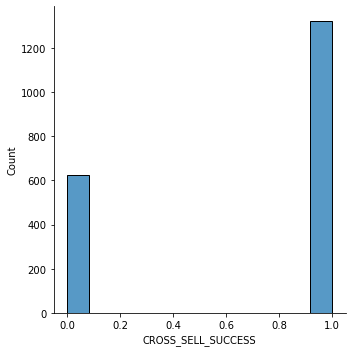

1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


In [3]:
#showing histogram of Cross Sell Success
sns.displot(x = 'CROSS_SELL_SUCCESS',
           data = chef)

plt.show()

#examining distribution of dependent variable
print(chef['CROSS_SELL_SUCCESS'].value_counts())

# Data Preparation


## Anomaly Handling

In [4]:
#checking for missing values
chef.isnull().any().any()

True

In [5]:
#automatically flagging rows with missing values
for col in chef:

    if chef[col].isnull().astype(int).sum() > 0:
        chef['m_'+col] = chef[col].isnull().astype(int)

In [6]:
#dropping Family name variable
chef = chef.drop('FAMILY_NAME', axis = 1)

In [7]:
#checking for missing values
chef.isnull().any().any()

False

## User-defined Functions

In [8]:
########################################
# optimal_neighbors
######################################## 
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# Data Exploration

## Examining Correlations

In [9]:
#creating correlation object 
chef_corr = chef.corr(method = 'pearson')

#sorting correlations with cross sell success feature
chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False).round(decimals = 2)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
MASTER_CLASSES_ATTENDED        0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
AVG_PREP_VID_TIME              0.03
MEDIAN_MEAL_RATING             0.03
AVG_NUMBER_MEALS               0.02
EARLY_DELIVERIES               0.02
m_FAMILY_NAME                  0.02
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
LATE_DELIVERIES                0.01
TOTAL_MEALS_ORDERED            0.01
PRODUCT_CATEGORIES_VIEWED      0.00
REVENUE                        0.00
UNIQUE_MEALS_PURCH             0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
MOBILE_LOGINS                 -0.05
CANCELLATIONS_AFTER_NOON      -0.05
Name: CROSS_SELL_SUCCESS, dtype: float64

## Examining Explanatory variables for distribution

In [10]:
#for col in chef:
 #   sns.histplot(x= col,
  #               data = chef)
   # 
    #plt.show()

# Feature Engineering

## Features with many zeroes

In [11]:
#counting number of zeroes
WEEKLY_PLAN_ZEROES = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0]) 
PHOTOS_VIEWED_ZEROES = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])


# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Weekly_Plan    | {WEEKLY_PLAN_ZEROES}\t\t{len(chef) - WEEKLY_PLAN_ZEROES}
Photos_Viewed  | {PHOTOS_VIEWED_ZEROES}\t\t{len(chef) - PHOTOS_VIEWED_ZEROES}
""")


                 No		Yes
               ---------------------
Weekly_Plan    | 468		1478
Photos_Viewed  | 1140		806



In [12]:
#dummy variables
chef['EVER_WEEKLY_PLAN'] = 0
chef['PHOTOS_VIEWED_AT_ALL'] = 0


#creating loop to iterate over dataset
for index, value in chef.iterrows():
    
    #assigning 1 to customers that already had weekly plans
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'EVER_WEEKLY_PLAN'] = 1
        
    #assigning 1 to customers that already viewed photos
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'PHOTOS_VIEWED_AT_ALL'] = 1
 

## Delivery
Creating Feature: Punctual Delivery

In [13]:
#creating empty dummy variable
chef['PUNCTUAL_DELIVERIES'] = 0


#loop running over dataset
for index, value in chef.iterrows():
    
    if chef.loc[index, 'LATE_DELIVERIES'] == 0 and chef.loc[index, 'EARLY_DELIVERIES'] == 0:
        chef.loc[index, 'PUNCTUAL_DELIVERIES'] = 1
        
#examining distribution of dummy variable        
chef['PUNCTUAL_DELIVERIES'].value_counts()

0    1752
1     194
Name: PUNCTUAL_DELIVERIES, dtype: int64

## Cancellations

### Cancellations at all

In [14]:
#Creating dummy variable
chef['CANCELLATIONS'] = 0

#looping over dataset
for index, value in chef.iterrows():
    
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0 or chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'CANCELLATIONS'] = 1

#analyzing distribution of new feature
chef['CANCELLATIONS'].value_counts()

1    1374
0     572
Name: CANCELLATIONS, dtype: int64

### Total Cancellations

In [15]:
#total cancellations
chef['TOTAL_CANCELLATIONS'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON'] +1

### Cancellations Before Noon Dummy
Based on Feature importance of Classification Tree

In [16]:
#placeholder list
placeholder_lst = []

#looping over feature
for number in chef['CANCELLATIONS_BEFORE_NOON']:
    if number <= 1.5:
        placeholder_lst.append(0)
    else:
        placeholder_lst.append(1)

#adding feature to dataset
chef['CANCELLATIONS_BEFORE_NOON_SPLIT'] = pd.Series(placeholder_lst)

### Cancellations After Noon Dummy
Based on Feature importance of Classification Tree

In [17]:
#placeholder list
placeholder_lst = []

#looping over feature
for number in chef['CANCELLATIONS_AFTER_NOON']:
    if number <= 0.828:
        placeholder_lst.append(0)
    else:
        placeholder_lst.append(1)

#adding feature to dataset
chef['CANCELLATIONS_AFTER_NOON_SPLIT'] = pd.Series(placeholder_lst)

### After Noon per Meal Ordered

In [18]:
#cancellation after noon per meal ordered
chef['CANCELLATION_AFTER_NOON_PMO'] = chef['CANCELLATIONS_AFTER_NOON'] / chef['TOTAL_MEALS_ORDERED']

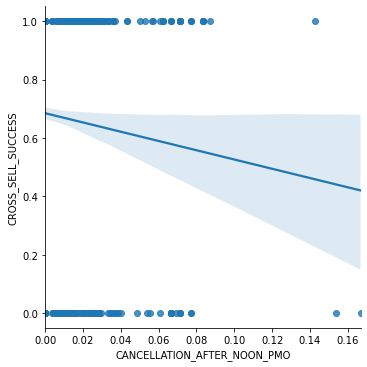

In [19]:
#analyzing relationship in plot
sns.lmplot(x = 'CANCELLATION_AFTER_NOON_PMO',
          y = 'CROSS_SELL_SUCCESS',
          data = chef)
plt.show()

## Customer Support Contacts per Meal Ordered

In [20]:
#generating feature as ratio of service requests per meal ordered
chef['CONTACTS_W_CUSTOMER_SERVICE_PMO'] =  chef['TOTAL_MEALS_ORDERED'] / chef['CONTACTS_W_CUSTOMER_SERVICE']

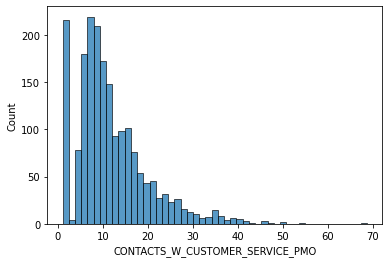

In [21]:
#visualizing distribution of variable
sns.histplot(x='CONTACTS_W_CUSTOMER_SERVICE_PMO',
            data = chef)

plt.show()

## Unique Meals per Meal Ordered

In [22]:
#creating feature
chef['UNIQUE_MEALS_PURCH_PMO'] = chef['UNIQUE_MEALS_PURCH'] / chef['TOTAL_MEALS_ORDERED']

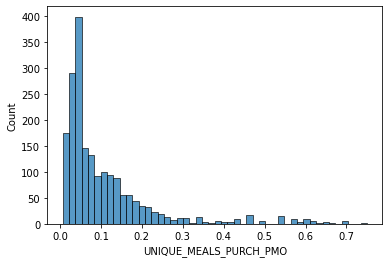

In [23]:
#visualizing distribution of variable
sns.histplot(x='UNIQUE_MEALS_PURCH_PMO',
            data = chef)

plt.show()

## Total Photos Viewed per Time Online

In [24]:
#developing ratio of photos viewed and average time on website
chef['PHOTOS_PER_TIME_ONLINE'] = chef['TOTAL_PHOTOS_VIEWED'] / chef['AVG_TIME_PER_SITE_VISIT']

## Preferences and Weekly Plan

In [25]:
#creating placeholder_lst
placeholder_lst = []

#looping over the dataset and determining which customers made use of customization
for index, value in chef.iterrows():
    if chef.loc[index, 'TASTES_AND_PREFERENCES'] == 1 and chef.loc[index, 'WEEKLY_PLAN'] > 0:
        placeholder_lst.append(1)
        
    else:
        placeholder_lst.append(0)
        
#creating new feature 'customized'
chef['CUSTOMIZED'] = pd.Series(placeholder_lst)

#examining distribution of new feature
chef['CUSTOMIZED'].value_counts()

1    1055
0     891
Name: CUSTOMIZED, dtype: int64

## Email

In [26]:
#generating empty list
placeholder_lst = []

for index, value in chef.iterrows():
    
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    placeholder_lst.append(split_email)
    
email_df = pd.DataFrame(placeholder_lst)

email_df.columns = ['0', 'EMAIL_DOMAIN']

#adding email domain feature to chef dataset
chef = pd.concat([chef, email_df['EMAIL_DOMAIN']], axis = 1)

In [27]:
#grouping mail domains in professional, personal and junk
professional_mail = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com', 
                    '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com', 
                    '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                    '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
                     '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                    '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']

personal_mail = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_mail = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


#placeholder list
placeholder_lst = []


#loop to go over domains and assign categories
for domain in chef['EMAIL_DOMAIN']:
    
    if '@' + domain in professional_mail:
        placeholder_lst.append('PROFESSIONAL_MAIL')
        
    elif '@' + domain in personal_mail:
        placeholder_lst.append('PERSONAL_MAIL')
        
    elif '@' + domain in junk_mail:
        placeholder_lst.append('JUNK_MAIL')

#creating new feature, gomain group
chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

In [28]:
#one-hot encoding of domain group variable
one_hot_domain = pd.get_dummies(chef['DOMAIN_GROUP'])

#dropping categorical variables after encoding
chef = chef.drop('DOMAIN_GROUP', axis = 1 )

#adding dummy variables to dataset
chef = chef.join([one_hot_domain])

In [29]:
#dropping the variables of types object
chef = chef.drop(['EMAIL', 'EMAIL_DOMAIN'], axis = 1)

## Gender

In [30]:
#loading in the gender List
gender_file = "./datasets/chef_gender.xlsx"

gender = pd.read_excel(io = gender_file)

In [31]:
#creating dummy variables
one_hot_gender = pd.get_dummies(gender)

one_hot_gender.columns = ['andy', 'FEMALE', 'MALE', 'mostly_female', 
                          'mostly_male','unknown']

#dropping variables related to gender
chef = chef.drop(['FIRST_NAME'], axis = 1)

#joining dummy variables to chef
chef = chef.join(one_hot_gender.iloc[:, 1:3])

## Name Split

In [32]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [33]:
#calling text_split_function to count number of names
text_split_feature(col = 'NAME', 
                   df = chef,
                  new_col_name = 'NUMBER_OF_NAMES')

#dropping the name feature
chef = chef.drop('NAME', axis =1)

## Logrithmic transformation of Features

In [34]:
#dictionary with all features to be transformed
log_features = ['REVENUE', 'TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH', 
                'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 
                'AVG_PREP_VID_TIME', 'AVG_NUMBER_MEALS', 'AVG_CLICKS_PER_VISIT',
               'TOTAL_CANCELLATIONS', 'CONTACTS_W_CUSTOMER_SERVICE_PMO',
               'UNIQUE_MEALS_PURCH_PMO'] #not sure about AVG_Clicks

#loop for transformation of all features from dictionary
for feature in log_features:
    
    #logrithmic transformation of features
    chef['LOG_'+feature] = np.log10(chef[feature])
    

#dropping normal form of transformed variables
chef = chef.drop(log_features, axis = 1)

## Log Dummy variable generation 
Based on Feature importance model from Classification Tree

In [35]:
#dummy list generation
dummy_list = [['LOG_TOTAL_CANCELLATIONS', 0.344], 
              ['LOG_CONTACTS_W_CUSTOMER_SERVICE', 0.812], 
              ['LOG_AVG_PREP_VID_TIME', 2.178], 
              ['LOG_UNIQUE_MEALS_PURCH_PMO', -0.866]]

#looping over the dummy list
for feature, split in dummy_list:
    
    #placeholder list
    placeholder_lst = []
    
    #looping over feature
    for observation in chef[feature]:
        
        #conditional statement
        if split <= observation:
            placeholder_lst.append(0)
        else:
            placeholder_lst.append(1)
    
    #creating new features in dataset
    chef[feature + '_SPLIT'] = pd.Series(placeholder_lst)

# Developing Models

## Train Test Split

In [36]:
#setting explanatory data
chef_expl = chef.drop('CROSS_SELL_SUCCESS', axis = 1)

#setting dependent variable
chef_target = chef['CROSS_SELL_SUCCESS']



# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_expl,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

In [37]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = False).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = False).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    990
0    469
Name: CROSS_SELL_SUCCESS, dtype: int64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    331
0    156
Name: CROSS_SELL_SUCCESS, dtype: int64



## Logistic Regression

In [38]:
for val in chef_expl:
    print(f" {val} + ")

 PRODUCT_CATEGORIES_VIEWED + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 m_FAMILY_NAME + 
 EVER_WEEKLY_PLAN + 
 PHOTOS_VIEWED_AT_ALL + 
 PUNCTUAL_DELIVERIES + 
 CANCELLATIONS + 
 CANCELLATIONS_BEFORE_NOON_SPLIT + 
 CANCELLATIONS_AFTER_NOON_SPLIT + 
 CANCELLATION_AFTER_NOON_PMO + 
 PHOTOS_PER_TIME_ONLINE + 
 CUSTOMIZED + 
 JUNK_MAIL + 
 PERSONAL_MAIL + 
 PROFESSIONAL_MAIL + 
 FEMALE + 
 MALE + 
 NUMBER_OF_NAMES + 
 LOG_REVENUE + 
 LOG_TOTAL_MEALS_ORDERED + 
 LOG_UNIQUE_MEALS_PURCH + 
 LOG_CONTACTS_W_CUSTOMER_SERVICE + 
 LOG_AVG_TIME_PER_SITE_VISIT + 
 LOG_AVG_PREP_VID_TIME + 
 LOG_AVG_NUMBER_MEALS + 
 LOG_AVG_CLICKS_PER_VISIT + 
 LOG_TOTAL_CANCELLATIONS + 
 LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO + 
 LOG_UNIQUE_MEALS_PURCH_PMO

In [39]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~   
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 EARLY_DELIVERIES + 
 REFRIGERATED_LOCKER + 
 JUNK_MAIL + 
 PROFESSIONAL_MAIL + 
 MALE +  
 NUMBER_OF_NAMES + 
 LOG_AVG_PREP_VID_TIME  """,
                           data    = chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.536391
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 Feb 2021   Pseudo R-squ.:                  0.1458
Time:                        15:36:51   Log-Likelihood:                -782.59
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 6.929e-51
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.8812      1.168     -4.179      0.000      -7.170      -2.592
MOBILE_NUMBER                 0.8975      0.178      5.048      0.000       0.549       1.246
CANCELLATIONS_BEFORE_NOON     0.2832      0.047      6.053      0.000       0.191       0.375
TASTES_AND_PREFERENCES        0.3948      0.136      2.898      0.004       0.128       0.662
PC_LOGINS                     0.2333      0.107      2.171      0.030       0.023       0.444
EARLY_DELIVERIES              0.0611      0.028      2.197      0.028       0.007       0.116
REFRIGERATED_LOCKER           0.5387      0.210      2.560      0.010       0.126       0.951
JUNK_MAIL                    -1.3285      0.158     -8.391      0.000      -1.639      -1.018
PROFESSIONAL_MAIL             0.5891      0.145      4.064      0.000       0.305       0.873
MALE                          0.6158      0.156      3.938      0.000       0.309       0.922
NUMBER_OF_NAMES               0.4731      0.093      5.063      0.000       0.290       0.656
LOG_AVG_PREP_VID_TIME         0.8889      0.446      1.992      0.046       0.014       1.764
=============================================================================================
"""

In [40]:
# creating a dictionary to store candidate models

candidate_dict = {
    
#full model
    
    'logit'  : ['PRODUCT_CATEGORIES_VIEWED','MOBILE_NUMBER',
                'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
                'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS',
                'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
                'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
                'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'EVER_WEEKLY_PLAN', 
                'PHOTOS_VIEWED_AT_ALL','PUNCTUAL_DELIVERIES','CANCELLATIONS', 
                'CANCELLATIONS_BEFORE_NOON_SPLIT', 
                'CANCELLATIONS_AFTER_NOON_SPLIT','CANCELLATION_AFTER_NOON_PMO', 
                'PHOTOS_PER_TIME_ONLINE', 'CUSTOMIZED', 'JUNK_MAIL', 
                'PROFESSIONAL_MAIL', 'MALE','NUMBER_OF_NAMES','LOG_REVENUE', 
                'LOG_TOTAL_MEALS_ORDERED', 'LOG_UNIQUE_MEALS_PURCH', 
                'LOG_CONTACTS_W_CUSTOMER_SERVICE', 
                'LOG_AVG_TIME_PER_SITE_VISIT', 'LOG_AVG_PREP_VID_TIME', 
                'LOG_AVG_NUMBER_MEALS', 'LOG_AVG_CLICKS_PER_VISIT', 
                'LOG_TOTAL_CANCELLATIONS','LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO', 
                'LOG_UNIQUE_MEALS_PURCH_PMO', 'LOG_TOTAL_CANCELLATIONS_SPLIT', 
                'LOG_CONTACTS_W_CUSTOMER_SERVICE_SPLIT', 
                'LOG_AVG_PREP_VID_TIME_SPLIT', 
                'LOG_UNIQUE_MEALS_PURCH_PMO_SPLIT'],
    
#significant features for 0.15

    'logit_fsig' : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                    'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
                    'PC_LOGINS','MOBILE_LOGINS','EARLY_DELIVERIES',
                    'REFRIGERATED_LOCKER','CANCELLATIONS_BEFORE_NOON_SPLIT',
                    'JUNK_MAIL','PROFESSIONAL_MAIL','MALE',  'NUMBER_OF_NAMES',
                    'LOG_REVENUE',
                    'LOG_CONTACTS_W_CUSTOMER_SERVICE','LOG_AVG_PREP_VID_TIME',
                    'LOG_UNIQUE_MEALS_PURCH_PMO_SPLIT'],
    
#significant features for 0.05
    
    'logit_sig' : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'TASTES_AND_PREFERENCES','PC_LOGINS','EARLY_DELIVERIES',
                   'REFRIGERATED_LOCKER','JUNK_MAIL','PROFESSIONAL_MAIL',
                   'MALE', 'NUMBER_OF_NAMES', 'LOG_AVG_PREP_VID_TIME']

}

In [41]:
# train/test split with the full model
chef_expl   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_expl,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))
print('AUC Score:', roc_auc_score(y_true = y_test, 
                                  y_score = logreg_pred).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.7519
Testing  ACCURACY: 0.7413
AUC Score: 0.647


In [42]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 60
False Positives: 96
False Negatives: 30
True Positives : 301



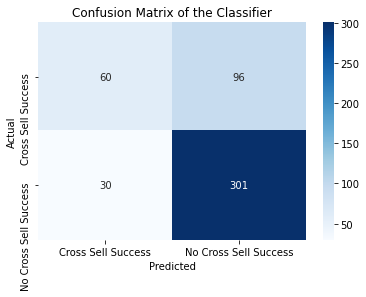

In [43]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross Sell Success', 'No Cross Sell Success'])

In [44]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -4.49)
('MOBILE_NUMBER', 0.87)
('CANCELLATIONS_BEFORE_NOON', 0.28)
('TASTES_AND_PREFERENCES', 0.38)
('PC_LOGINS', 0.23)
('EARLY_DELIVERIES', 0.06)
('REFRIGERATED_LOCKER', 0.51)
('JUNK_MAIL', -1.3)
('PROFESSIONAL_MAIL', 0.58)
('MALE', 0.6)
('NUMBER_OF_NAMES', 0.47)
('LOG_AVG_PREP_VID_TIME', 0.74)


In [45]:
#creating dictionary to compare model performance
model_performance = {'Model Name'       : 'Logistic (Default) (0.05)',
                          'Training Accuracy' : logreg_train_score,
                          'Testing Accuracy'  : logreg_test_score,
                          'AUC Score'         : logreg_auc_score,
                          'Confusion Matrix'  : [(logreg_tn,
                                                 logreg_fp,
                                                 logreg_fn,
                                                 logreg_tp)]}

#creating DataFrame with model Performance
model_performance = pd.DataFrame(model_performance)

### Hyperparameter Tuning

In [46]:
'''
#############
# Randomized Search cv
##############

#declaring hyperparameter space
C_space      = np.arange(0.1, 10, 0.1)
fit_intercept = [True, False]
solver       = ['newton-cg', 'sag', 'lbfgs', 'saga']
warm_start   = [True, False]

#creating hyperparameter grid
param_grid = {'C'            : C_space,
             'fit_intercept' : fit_intercept,
             'solver'        : solver,
             'warm_start'    : warm_start}

#INSTANTIATING model without hyperparameters
lr_tuned = LogisticRegression(max_iter = 1000,
                             random_state = 219)


#Randomized Search cv
lr_tuned_cv = RandomizedSearchCV(estimator          = lr_tuned,
                                param_distributions = param_grid,
                                cv                  = 3,
                                n_iter              = 500,
                                random_state        = 219,
                                scoring             = make_scorer(roc_auc_score,
                                                                  needs_threshold = False)) # scoring criteria (AUC))

#Fitting to Full dataset
lr_tuned_cv.fit(chef_expl, chef_target)

#PREDICT step is not requred



# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))
'''

'\n#############\n# Randomized Search cv\n##############\n\n#declaring hyperparameter space\nC_space      = np.arange(0.1, 10, 0.1)\nfit_intercept = [True, False]\nsolver       = [\'newton-cg\', \'sag\', \'lbfgs\', \'saga\']\nwarm_start   = [True, False]\n\n#creating hyperparameter grid\nparam_grid = {\'C\'            : C_space,\n             \'fit_intercept\' : fit_intercept,\n             \'solver\'        : solver,\n             \'warm_start\'    : warm_start}\n\n#INSTANTIATING model without hyperparameters\nlr_tuned = LogisticRegression(max_iter = 1000,\n                             random_state = 219)\n\n\n#Randomized Search cv\nlr_tuned_cv = RandomizedSearchCV(estimator          = lr_tuned,\n                                param_distributions = param_grid,\n                                cv                  = 3,\n                                n_iter              = 500,\n                                random_state        = 219,\n                                scoring         

In [47]:
# checking the best estimator for the model
#lr_tuned_cv.best_estimator_

In [48]:
#building model based on best hyperparameters according to previous

#INSTANTIATING the model
#lr_tuned = LogisticRegression(C=7.3, max_iter=1000, random_state=219, solver='saga') for 0.15
lr_tuned = LogisticRegression(C=7.3, max_iter=1000, random_state=219, solver='saga') #for 0.05

#Fitting the model is not required
lr_tuned_fit = lr_tuned.fit(x_train, y_train)

#PREDICTING on the model
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc_score         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7519
Testing  ACCURACY: 0.7372
AUC Score        : 0.644


In [49]:
# unpacking the confusion matrix
log_tuned_tn, \
log_tuned_fp, \
log_tuned_fn, \
log_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {log_tuned_tn}
False Positives: {log_tuned_fp}
False Negatives: {log_tuned_fn}
True Positives : {log_tuned_tp}
""")


True Negatives : 60
False Positives: 96
False Negatives: 32
True Positives : 299



In [50]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'Logistic (Tuned) (0.05)',
                          'Training Accuracy' : lr_tuned_train_score,
                          'Testing Accuracy'  : lr_tuned_test_score,
                          'AUC Score'         : lr_tuned_auc_score,
                          'Confusion Matrix'  : (log_tuned_tn,
                                                 log_tuned_fp,
                                                 log_tuned_fn,
                                                 log_tuned_tp)},
                          ignore_index = True)

## Classification Trees (CART Models)

In [51]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [52]:
# train/test split with the full model
chef_expl   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_expl,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)

In [53]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9993
Full Tree Testing ACCURACY : 0.6694
Full Tree AUC Score: 0.6161


In [54]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 73
False Positives: 83
False Negatives: 78
True Positives : 253



In [55]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = x_train)

In [56]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'Tree (Default) (0.05)',
                          'Training Accuracy' : full_tree_train_score,
                          'Testing Accuracy'  : full_tree_test_score,
                          'AUC Score'         : full_tree_auc_score,
                          'Confusion Matrix'  : (full_tree_tn,
                                                 full_tree_fp,
                                                 full_tree_fn,
                                                 full_tree_tp)},
                          ignore_index = True)

### Hyperparameter Tuning

In [57]:
'''
################
#Randomized Search cv
###################

#defining hyperparameterspace
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1, 50, 1)
samples_leaf = np.arange(1, 50, 1)
min_sample_split = np.arange(2, 20, 1)

#creating hyperparameter grid
param_grid = {'criterion'  : criterion,
              'splitter'   : splitter,
              'max_depth'  : max_depth,
              'min_samples_leaf' : samples_leaf,
             'min_samples_split' : min_sample_split}

#INSTANTIATING Tree
tuned_tree = DecisionTreeClassifier(random_state = 219)

#RandomizedSearchcv
tuned_tree_cv = RandomizedSearchCV(estimator          = tuned_tree,
                                  param_distributions = param_grid,
                                  cv                  = 3,
                                  n_iter              = 2000,
                                  random_state        = 219,
                                  scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))
#Fitting the model on full dataset
tuned_tree_cv.fit(chef_expl, chef_target)

#PREDICT is not required


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))
'''

'\n################\n#Randomized Search cv\n###################\n\n#defining hyperparameterspace\ncriterion = [\'gini\', \'entropy\']\nsplitter = [\'best\', \'random\']\nmax_depth = np.arange(1, 50, 1)\nsamples_leaf = np.arange(1, 50, 1)\nmin_sample_split = np.arange(2, 20, 1)\n\n#creating hyperparameter grid\nparam_grid = {\'criterion\'  : criterion,\n              \'splitter\'   : splitter,\n              \'max_depth\'  : max_depth,\n              \'min_samples_leaf\' : samples_leaf,\n             \'min_samples_split\' : min_sample_split}\n\n#INSTANTIATING Tree\ntuned_tree = DecisionTreeClassifier(random_state = 219)\n\n#RandomizedSearchcv\ntuned_tree_cv = RandomizedSearchCV(estimator          = tuned_tree,\n                                  param_distributions = param_grid,\n                                  cv                  = 3,\n                                  n_iter              = 2000,\n                                  random_state        = 219,\n                          

In [58]:
# checking the best estimator for the model
#tuned_tree_cv.best_estimator_

In [59]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
#tree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
 #                      min_samples_split=12, random_state=219) for 0.15
tree_tuned = DecisionTreeClassifier(max_depth=3, min_samples_leaf=21, min_samples_split=4,
                       random_state=219)

# FIT step is not needed
tree_tuned_fit = tree_tuned.fit(x_train, y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7361
Testing  ACCURACY: 0.7618
AUC Score        : 0.7299


In [60]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 100
False Positives: 56
False Negatives: 60
True Positives : 271



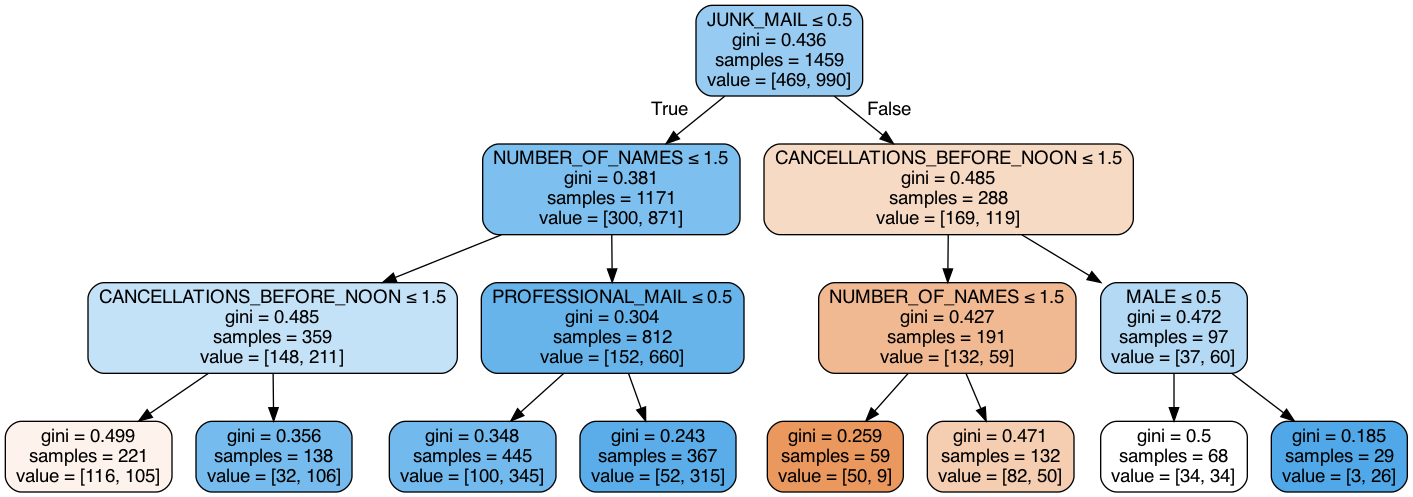

In [61]:
# calling display_tree
display_tree(tree       = tree_tuned_fit,
             feature_df = x_train)

<ipython-input-51-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


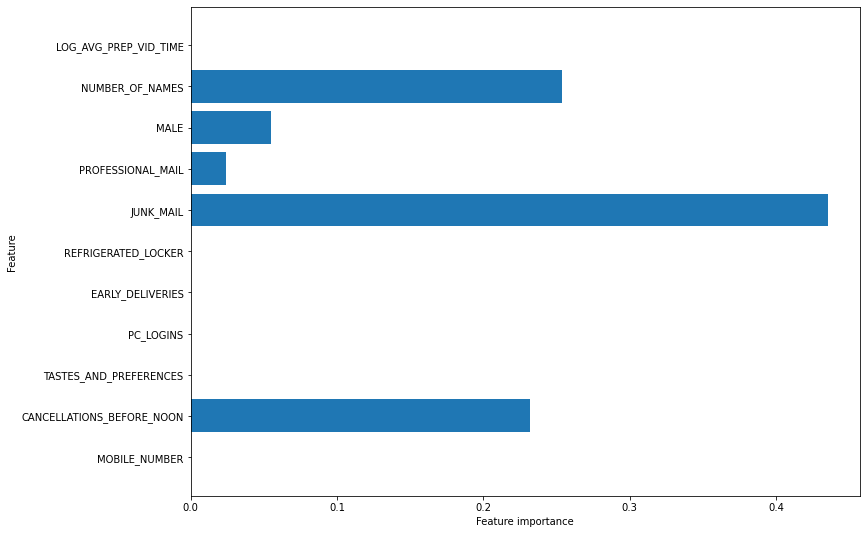

In [62]:
# plotting feature importance
plot_feature_importances(tree_tuned_fit,
                         train  = x_train,
                         export = False)

In [63]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'Tree (Tuned) (0.05)',
                          'Training Accuracy' : tree_tuned_train_score,
                          'Testing Accuracy'  : tree_tuned_test_score,
                          'AUC Score'         : tree_tuned_auc,
                          'Confusion Matrix'  : (tuned_tree_tn,
                                                 tuned_tree_fp,
                                                 tuned_tree_fn,
                                                 tuned_tree_tp)},
                          ignore_index = True)


## Random Forest

In [64]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_pred = rf_default_fit.predict(x_test)

#Scoring the results
rf_default_train_score = rf_default_fit.score(x_train, y_train).round(4)
rf_default_test_score  = rf_default_fit.score(x_test, y_test).round(4)
rf_default_auc_score    = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_pred).round(4)

# Printing the scores
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_pred).round(4))

Training ACCURACY: 0.9993
Testing  ACCURACY: 0.7474
AUC Score        : 0.6736


<ipython-input-51-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


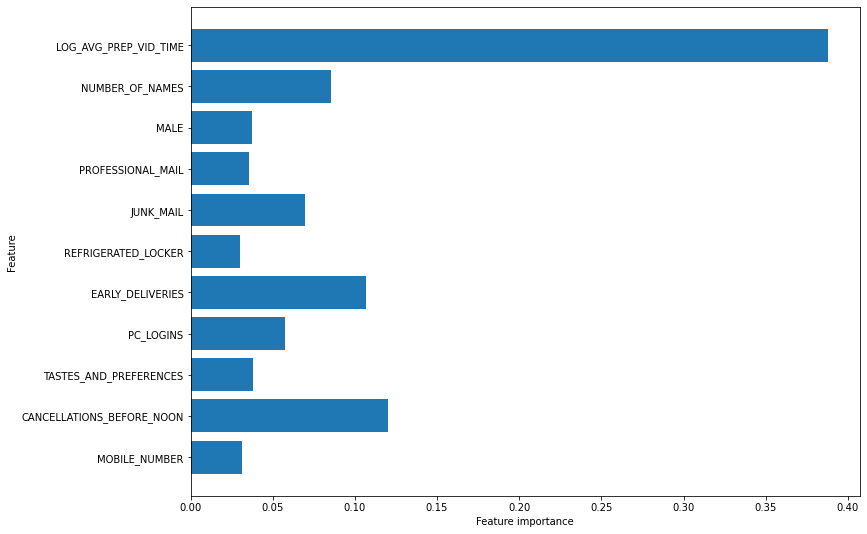

In [65]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit,
                        train = x_train)

In [66]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 73
False Positives: 83
False Negatives: 40
True Positives : 291



In [67]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'Random Forest (Default) (0.05)',
                          'Training Accuracy' : rf_default_train_score,
                          'Testing Accuracy'  : rf_default_test_score,
                          'AUC Score'         : rf_default_auc_score,
                          'Confusion Matrix'  : (rf_tn,
                                                 rf_fp,
                                                 rf_fn,
                                                 rf_tp)},
                          ignore_index = True)

### Hyperparameter Tuning

In [68]:
'''
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 2000, 250)
leaf_space       = pd.np.arange(1, 50, 10)
max_depth        = np.arange(1, 20, 1)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'max_depth'        : max_depth,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(chef_expl, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))
'''

'\n# declaring a hyperparameter space\nestimator_space  = pd.np.arange(100, 2000, 250)\nleaf_space       = pd.np.arange(1, 50, 10)\nmax_depth        = np.arange(1, 20, 1)\ncriterion_space  = [\'gini\', \'entropy\']\nbootstrap_space  = [True, False]\nwarm_start_space = [True, False]\n\n\n# creating a hyperparameter grid\nparam_grid = {\'n_estimators\'     : estimator_space,\n              \'min_samples_leaf\' : leaf_space,\n              \'max_depth\'        : max_depth,\n              \'criterion\'        : criterion_space,\n              \'bootstrap\'        : bootstrap_space,\n              \'warm_start\'       : warm_start_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nforest_grid = RandomForestClassifier(random_state = 219)\n\n\n# GridSearchCV object\nforest_cv = RandomizedSearchCV(estimator           = forest_grid,\n                               param_distributions = param_grid,\n                               cv         = 3,\n                              

In [69]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [70]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1350,
                       random_state=219)


# FITTING the model objectwertzuü+
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy

# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.828
Forest Tuned Testing  ACCURACY: 0.7782
Forest Tuned AUC Score        : 0.7013


<ipython-input-51-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


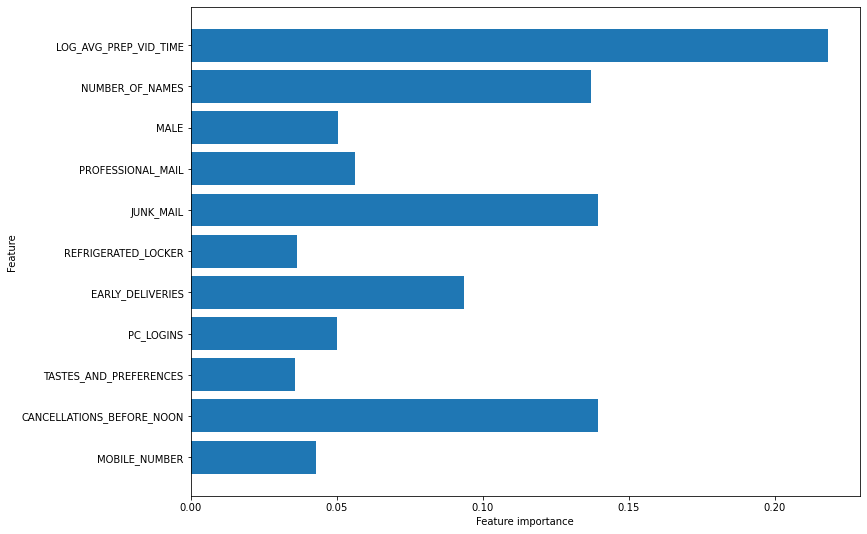

In [71]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [72]:
# unpacking the confusion matrix
rf_tuned_tn, \
rf_tuned_fp, \
rf_tuned_fn, \
rf_tuned_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tuned_tn}
False Positives: {rf_tuned_fp}
False Negatives: {rf_tuned_fn}
True Positives : {rf_tuned_tp}
""")


True Negatives : 76
False Positives: 80
False Negatives: 28
True Positives : 303



In [73]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'Random Forest (Tuned) (0.05)',
                          'Training Accuracy' : forest_tuned_train_score,
                          'Testing Accuracy'  : forest_tuned_test_score,
                          'AUC Score'         : forest_tuned_auc,
                          'Confusion Matrix'  : (rf_tuned_tn,
                                                 rf_tuned_fp,
                                                 rf_tuned_fn,
                                                 rf_tuned_tp)},
                          ignore_index = True)



## Gradient Boosted Machines

In [74]:
#INSTANTIATING Model
full_gbm_default = GradientBoostingClassifier()

#Fitting the model
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)

#PREDICT with the model
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)

#Scoring results
full_gbm_train_score = full_gbm_default.score(x_train,y_train).round(4)
full_gbm_test_score = full_gbm_default.score(x_test,y_test).round(4)
full_gbm_auc_score = roc_auc_score(y_true = y_test,
                                             y_score = full_gbm_default_pred).round(4)


#Printing the scores
print("GBM Default Training ACCURACY:", full_gbm_default.score(x_train,y_train).round(4))
print("GBM Default Testing ACCURACY:", full_gbm_default.score(x_test, y_test).round(4))
print("GBM Default AUC Score:", roc_auc_score(y_true = y_test,
                                             y_score = full_gbm_default_pred).round(4))

GBM Default Training ACCURACY: 0.8108
GBM Default Testing ACCURACY: 0.7864
GBM Default AUC Score: 0.7124


In [75]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 79
False Positives: 77
False Negatives: 27
True Positives : 304



In [76]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'GMB (Default) (0.05)',
                          'Training Accuracy' : full_gbm_train_score,
                          'Testing Accuracy'  : full_gbm_test_score,
                          'AUC Score'         : full_gbm_auc_score,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)

### Hyperparameter Tuning

In [77]:
'''
#declaring hyperparameter space
learn_space      = np.arange(0.1, 2.0, 0.2)
estimator_space = np.arange(100, 200, 25)
criterion       = ['friedman_mse', 'mse', 'mae']
#sample_split    = np.ararange(2, 20, 1)
sample_leaf     = np.arange(5, 30, 2)
max_depth       = np.arange(2, 20, 2)
warm_start      = [False, True]

#creating hyperparameter grid
param_grid = {'learning_rate' : learn_space,
             'n_estimators'   : estimator_space,
             'criterion'      : criterion,
             'min_samples_leaf':sample_leaf,
             'max_depth'      : max_depth,
             'warm_start'     : warm_start}

#INSTANTIATING Model
gbm_tuned = GradientBoostingClassifier(random_state=219)

#Randomized Search CV process
gbm_tuned_cv = RandomizedSearchCV(estimator         = gbm_tuned,
                                 param_distributions= param_grid,
                                 cv                 = 3,
                                 n_iter             = 50,
                                 random_state       = 219,
                                 scoring            = make_scorer(roc_auc_score,
                                                 needs_threshold = False))

#Fitting the model
gbm_tuned_cv.fit(chef_expl, chef_target)

#Predicting on the model - not required at this point


# printing the optimal parameters and best score
print("Tuned Parameters  :", gbm_tuned_cv.best_params_)
print("Tuned Training AUC:", gbm_tuned_cv.best_score_.round(4))
'''

'\n#declaring hyperparameter space\nlearn_space      = np.arange(0.1, 2.0, 0.2)\nestimator_space = np.arange(100, 200, 25)\ncriterion       = [\'friedman_mse\', \'mse\', \'mae\']\n#sample_split    = np.ararange(2, 20, 1)\nsample_leaf     = np.arange(5, 30, 2)\nmax_depth       = np.arange(2, 20, 2)\nwarm_start      = [False, True]\n\n#creating hyperparameter grid\nparam_grid = {\'learning_rate\' : learn_space,\n             \'n_estimators\'   : estimator_space,\n             \'criterion\'      : criterion,\n             \'min_samples_leaf\':sample_leaf,\n             \'max_depth\'      : max_depth,\n             \'warm_start\'     : warm_start}\n\n#INSTANTIATING Model\ngbm_tuned = GradientBoostingClassifier(random_state=219)\n\n#Randomized Search CV process\ngbm_tuned_cv = RandomizedSearchCV(estimator         = gbm_tuned,\n                                 param_distributions= param_grid,\n                                 cv                 = 3,\n                                 n_iter  

In [78]:
# best estimators based on RandomizedSearchCV
#gbm_tuned_cv.best_estimator_

In [79]:
#INSTANTIATING Tuned Model
gbm_tuned = GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=2,
                           min_samples_leaf=25, random_state=219) # for 0.05

#Fitting the model
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)

#PREDICT with the model
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)

#Scoring results
tuned_gbm_train_score = gbm_tuned.score(x_train,y_train).round(4)
tuned_gbm_test_score = gbm_tuned.score(x_test,y_test).round(4)
tuned_gbm_auc_score = roc_auc_score(y_true = y_test,
                                             y_score = gbm_tuned_pred).round(4)


#Printing the scores
print("GBM Default Training ACCURACY:", gbm_tuned.score(x_train,y_train).round(4))
print("GBM Default Testing ACCURACY:", gbm_tuned.score(x_test, y_test).round(4))
print("GBM Default AUC Score:", roc_auc_score(y_true = y_test,
                                             y_score = gbm_tuned_pred).round(4))

GBM Default Training ACCURACY: 0.8033
GBM Default Testing ACCURACY: 0.7803
GBM Default AUC Score: 0.7079


In [80]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 79
False Positives: 77
False Negatives: 30
True Positives : 301



In [81]:
#storing results in model performance
model_performance = model_performance.append( 
                          {'Model Name'       : 'GMB (Tuned) (0.05)',
                          'Training Accuracy' : tuned_gbm_train_score,
                          'Testing Accuracy'  : tuned_gbm_test_score,
                          'AUC Score'         : tuned_gbm_auc_score,
                          'Confusion Matrix'  : (gbm_tuned_tn,
                                                 gbm_tuned_fp,
                                                 gbm_tuned_fn,
                                                 gbm_tuned_tp)},
                          ignore_index = True)

# Performance Evaluation and Conclusion

In [82]:
#displaying the final table of model results
model_performance.sort_values('AUC Score', ascending = False)

Model Name  Training Accuracy  Testing Accuracy  \
3             Tree (Tuned) (0.05)             0.7361            0.7618   
6            GMB (Default) (0.05)             0.8108            0.7864   
7              GMB (Tuned) (0.05)             0.8033            0.7803   
5    Random Forest (Tuned) (0.05)             0.8280            0.7782   
4  Random Forest (Default) (0.05)             0.9993            0.7474   
0       Logistic (Default) (0.05)             0.7519            0.7413   
1         Logistic (Tuned) (0.05)             0.7519            0.7372   
2           Tree (Default) (0.05)             0.9993            0.6694   

   AUC Score    Confusion Matrix  
3     0.7299  (100, 56, 60, 271)  
6     0.7124   (79, 77, 27, 304)  
7     0.7079   (79, 77, 30, 301)  
5     0.7013   (76, 80, 28, 303)  
4     0.6736   (73, 83, 40, 291)  
0     0.6470   (60, 96, 30, 301)  
1     0.6440   (60, 96, 32, 299)  
2     0.6161   (73, 83, 78, 253)

To best predict which of the Apprentice Chef Customers would accept the offer, the <b>Tuned Classification Tree</b> shall be facilitated.

In [83]:
# saving the DataFrame to Excel
model_performance.to_excel('./classification_model_performance_0.05.xlsx',
                           index = False)